In [1]:
#Tensor
#(x,y,z)
#Example
#[[1,0,0,0],[0,1,0,0]]
#[[1,0,0,0],[0,0,1,0]]
#[[1,0,0,0],[0,,0,1]]

#(3,2,4)
#x=Sample Dimension
#y=Max length of sentence
#z=word vector dimesnion

In [2]:

'''' 
    # This network is a simple feedforward neural without with 10 inputs
model = Sequential()
model.add(Dense(8, input_shape=(10,), activation="relu")) ## 10 inputs ##  a first hidden layer with 8 nodes
model.add(Dense(4, activation="relu")) ## a second hidden layer with 4 nodes
model.add(Dense(1, activation="linear")) ##  final output layer used for regression


# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')
15

10 Inputs 3 Hidden layers of 10,20,10
'''


'\' \n    # This network is a simple feedforward neural without with 10 inputs\nmodel = Sequential()\nmodel.add(Dense(8, input_shape=(10,), activation="relu")) ## 10 inputs ##  a first hidden layer with 8 nodes\nmodel.add(Dense(4, activation="relu")) ## a second hidden layer with 4 nodes\nmodel.add(Dense(1, activation="linear")) ##  final output layer used for regression\n\n\n# Multilayer Perceptron\nfrom keras.utils import plot_model\nfrom keras.models import Model\nfrom keras.layers import Input\nfrom keras.layers import Dense\nvisible = Input(shape=(10,))\nhidden1 = Dense(10, activation=\'relu\')(visible)\nhidden2 = Dense(20, activation=\'relu\')(hidden1)\nhidden3 = Dense(10, activation=\'relu\')(hidden2)\noutput = Dense(1, activation=\'sigmoid\')(hidden3)\nmodel = Model(inputs=visible, outputs=output)\n# summarize layers\nprint(model.summary())\n# plot graph\nplot_model(model, to_file=\'multilayer_perceptron_graph.png\')\n15\n\n10 Inputs 3 Hidden layers of 10,20,10\n'

In [3]:
import os
import matplotlib.pylab as plt
import pandas as pd

import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential,Model
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate, Dropout
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
warnings.filterwarnings("ignore")
%matplotlib inline

Using TensorFlow backend.


In [4]:
url = 'http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls'
# Load the file into a Pandas DataFrame
data_df = pd.read_excel(url)
print('DataFrame size:', data_df.shape)

DataFrame size: (2930, 82)


In [5]:
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,...,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,...,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,...,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,...,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,...,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,...,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
missing_more_90=data_df[data_df.columns[data_df.isnull().mean() > 0.9]].columns
missing_more_90

Index(['Alley', 'Pool QC', 'Misc Feature'], dtype='object')

In [7]:
data_df=data_df.drop(missing_more_90, axis=1)
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,...,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,...,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,...,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,MnPrv,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,...,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,...,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,...,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,MnPrv,0,3,2010,WD,Normal,189900


#### Cat Variable

In [8]:
print('Finding Categorical Variables')
cat_variable = data_df.select_dtypes(include=["object_"]).columns
cat_variable

Finding Categorical Variables


Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Fence', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [9]:
missing_df_category = data_df[cat_variable].isnull().sum(axis=0).reset_index()
missing_df_category.columns = ['variable', 'missing values']
missing_df_category['filling factor (%)']=(data_df[cat_variable].shape[0]-missing_df_category['missing values'])/data_df[cat_variable].shape[0]*100
missing_df_category.sort_values('filling factor (%)').reset_index(drop = True).head()

,variable,missing values,filling factor (%)
0,Fence,2358,19.522184
1,Fireplace Qu,1422,51.467577
2,Garage Cond,159,94.573379
3,Garage Qual,159,94.573379
4,Garage Finish,159,94.573379


In [10]:
print('Imputing Null values on categorical Columns')
for var_cat in data_df[cat_variable]:
    if data_df[var_cat].isnull().values.any():
        data_df[var_cat] = data_df[var_cat].fillna(data_df[var_cat].mode().iloc[0])
        
print('Checking Null Values in Dataset::',data_df[var_cat].isnull().values.any())

#data_df['Fence'].unique()
#data_df['Bsmt Cond'].value_counts()

Imputing Null values on categorical Columns
Checking Null Values in Dataset:: False


#### Numerical/Integer Variables

In [11]:
print('Finding Numerical/Integer Variables')

int_var = data_df.select_dtypes(exclude =["object_"]).columns
int_var

Finding Numerical/Integer Variables


Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [12]:
## Deleteing SalesPrice as a Target
int_var_without_target=int_var.delete(-1)
int_var_without_target

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [13]:
missing_df_integer = data_df[int_var].isnull().sum(axis=0).reset_index()
missing_df_integer.columns = ['variable', 'missing values']
missing_df_integer['filling factor (%)']=(data_df[int_var].shape[0]-missing_df_integer['missing values'])/data_df[int_var].shape[0]*100
missing_df_integer.sort_values('filling factor (%)').reset_index(drop = True).head()

,variable,missing values,filling factor (%)
0,Lot Frontage,490,83.276451
1,Garage Yr Blt,159,94.573379
2,Mas Vnr Area,23,99.215017
3,Bsmt Half Bath,2,99.931741
4,Bsmt Full Bath,2,99.931741


In [14]:
print('Imputing Null values on Numerical/Integer Columns')
for var_int in data_df[int_var]:
    if data_df[var_int].isnull().values.any():
        data_df[var_int]=data_df[var_int].fillna(data_df[var_int].mean())
        
print('Checking Null Values in Dataset::',data_df[var_int].isnull().values.any())

Imputing Null values on Numerical/Integer Columns
Checking Null Values in Dataset:: False


#### Label Encoding

In [15]:
embed_cols=[i for i in data_df.select_dtypes(include=['object'])]

#converting data to list format to match the network structure
def preproc(X_train):

    input_list_train = []
    
    #the cols to be embedded: rescaling to range [0, # values)
    for c in embed_cols:
        raw_vals = np.unique(X_train[c])
        val_map = {}
        for i in range(len(raw_vals)):
            val_map[raw_vals[i]] = i       
        input_list_train.append(X_train[c].map(val_map).values)
     
    #the rest of the columns
    other_cols = [c for c in X_train.columns if (not c in embed_cols)]
    input_list_train.append(X_train[other_cols].values)
    
    return input_list_train

#from sklearn import preprocessing
#for f in data_df[cat_variable]:
#    if data_df[f].dtype=='object':
#        lbl = preprocessing.LabelEncoder()
#        lbl.fit(list(data_df[f].values))
        
#        data_df[f] = lbl.transform(list(data_df[f].values))

In [16]:
for categorical_var in data_df[cat_variable]:
    
    cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
  
    no_of_unique_cat  = data_df[categorical_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
  
    print('Categorica Variable:', categorical_var,
        'Unique Categories:', no_of_unique_cat,
        'Embedding Size:', embedding_size)

Categorica Variable: MS Zoning Unique Categories: 7 Embedding Size: 4
Categorica Variable: Street Unique Categories: 2 Embedding Size: 1
Categorica Variable: Lot Shape Unique Categories: 4 Embedding Size: 2
Categorica Variable: Land Contour Unique Categories: 4 Embedding Size: 2
Categorica Variable: Utilities Unique Categories: 3 Embedding Size: 2
Categorica Variable: Lot Config Unique Categories: 5 Embedding Size: 3
Categorica Variable: Land Slope Unique Categories: 3 Embedding Size: 2
Categorica Variable: Neighborhood Unique Categories: 28 Embedding Size: 14
Categorica Variable: Condition 1 Unique Categories: 9 Embedding Size: 5
Categorica Variable: Condition 2 Unique Categories: 8 Embedding Size: 4
Categorica Variable: Bldg Type Unique Categories: 5 Embedding Size: 3
Categorica Variable: House Style Unique Categories: 8 Embedding Size: 4
Categorica Variable: Roof Style Unique Categories: 6 Embedding Size: 3
Categorica Variable: Roof Matl Unique Categories: 8 Embedding Size: 4
Catego

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Embedding
from keras.layers import Input

input_models=[]
output_embeddings=[]
for cat_var in data_df[cat_variable]:
       
    unique_categories = data_df[cat_var].nunique() ## Number of Unique
    cat_emb_name= cat_var.replace(" ", "")+'_Embedding'
    embedding_size = int(min(np.ceil((unique_categories)/2), 50 ))
    
    #One Embedding Layer for each categorical variable
    input_model = Input(shape=(1,))    
    output_model = Embedding(unique_categories, embedding_size, name=cat_emb_name)(input_model)              
    output_model = Reshape(target_shape=(embedding_size,))(output_model)
    
    input_models.append(input_model)
    output_embeddings.append(output_model)
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics_input=Input(shape=(len(data_df[int_var_without_target].select_dtypes(include=numerics).columns.tolist()),))
numeric_modeling = Dense(512)(numerics_input)
input_models.append(numerics_input)
output_embeddings.append(numeric_modeling)

In [18]:
def NN_Create():
    visible = Concatenate()(output_embeddings)
    hidden1 = Dense(1000, activation='relu',kernel_initializer="uniform")(visible)
    dropout1 = Dropout(.3)(hidden1)
    hidden2 = Dense(512, activation='relu',kernel_initializer="uniform")(dropout1)
    dropout2 = Dropout(.2)(hidden2)
    output= Dense(1, activation='linear')(dropout2)
    model = Model(inputs=input_models, outputs=output)
    
    return model

#### Scaling

In [19]:
### Predictor Variables
scalar=StandardScaler()
scalar.fit(data_df[int_var].values.reshape(-1, data_df[int_var].shape[1]))
data_df[int_var]=scalar.transform(data_df[int_var].values.reshape(-1, data_df[int_var].shape[1]))

#### target Variable
#target = ['SalePrice']
#Y=data_df[target]
#scalar.fit(Y)
#Y=scalar.transform(Y)

In [20]:
target = ['SalePrice']
Y=data_df[target] ## traget data

X=data_df.drop(['SalePrice'],axis=1)

#### Stratified split

In [21]:
from sklearn.model_selection import StratifiedKFold

In [22]:
embed_cols=[i for i in data_df.select_dtypes(include=['object'])]

for c in embed_cols:
    raw_vals = np.unique(X[c])
    val_map = {}
    for i in range(len(raw_vals)):
        val_map[raw_vals[i]] = i       
    X[c]=X[c].map(val_map).values

In [23]:
X.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,...,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,-1.731460,-0.997164,-0.877005,5,3.366911,2.744381,1,0,3,0,0,0,15,2,2,0,2,-0.067254,-0.506718,-0.375537,-1.163488,3,1,3,10,...,4,0.354167,7,2.162180,2,1,-0.730511,0,0.306699,0.256684,4,4,1,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,2,-0.089422,-0.448057,1.678499,9,4
1,-1.730277,-0.996904,-0.877005,4,0.505463,0.187097,1,3,3,0,4,0,15,1,2,0,2,-0.776079,0.393091,-0.342468,-1.115542,1,1,13,14,...,4,-0.917535,7,-0.925143,2,1,-0.690223,2,-1.008560,1.196337,4,4,2,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,2,-0.089422,-0.079602,1.678499,9,4
2,-1.729095,-0.996899,-0.877005,5,0.552372,0.522814,1,0,3,0,0,0,15,2,2,0,2,-0.067254,0.393091,-0.441674,-1.259380,3,1,14,15,...,2,-0.281684,7,-0.925143,2,1,-0.811085,2,-1.008560,-0.748092,4,4,2,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,2,21.985725,-0.079602,1.678499,9,4
3,-1.727913,-0.996888,-0.877005,5,1.115280,0.128458,1,3,3,0,0,0,15,2,2,0,2,0.641571,-0.506718,-0.110988,-0.779919,3,1,3,3,...,0,0.990018,7,2.162180,4,1,-0.408211,0,0.306699,0.228774,4,4,2,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,2,-0.089422,-0.816513,1.678499,9,4
4,-1.726731,-0.992903,0.061285,5,0.224010,0.467348,1,0,3,0,4,0,8,2,2,0,5,-0.776079,-0.506718,0.848000,0.658466,1,1,13,14,...,4,-0.281684,7,0.618518,4,1,0.760126,0,0.306699,0.042704,4,4,2,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,2,-0.089422,-1.184969,1.678499,9,4


In [24]:
#%%time
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import gc

NFOLDS = 5
folds = KFold(n_splits=NFOLDS)
columns =X.columns
splits = folds.split(X,Y)
y_oof = np.zeros(X.shape[0])

score=0

for fold_n, (train_index, valid_index) in enumerate(splits):
    
    print('Number of Folds',fold_n +1)
    X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
    y_train, y_valid = Y.iloc[train_index], Y.iloc[valid_index]
    
    X_train = preproc(X_train)
    X_valid = preproc(X_valid)
    
    model=NN_Create()
    model.compile(loss='mean_squared_error', optimizer='Adam',metrics=['mse','mape'])   

    model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split = 0.2)
    
    y_pred_valid = model.predict(X_valid)
    y_pred_valid=y_pred_valid.reshape(y_pred_valid.shape[0],)
    y_oof[valid_index]= y_pred_valid
        

    print(f"Fold {fold_n + 1} | AUC: {mean_squared_error(y_valid, y_pred_valid)}")
    
    score += mean_squared_error(y_valid, y_pred_valid) / NFOLDS
    print('score',score)
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    print('-----------------------------------------------------------------------------------------------')
    

print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {mean_squared_error(Y, y_oof)}")


Number of Folds 1

Train on 1875 samples, validate on 469 samples
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4811 - mse: 0.4811 - mape: 284.7632 - val_loss: 0.1606 - val_mse: 0.1606 - val_mape: 86.5097
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2631 - mse: 0.2631 - mape: 188.8298 - val_loss: 0.2300 - val_mse: 0.2300 - val_mape: 97.6274
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1957 - mse: 0.1957 - mape: 162.4477 - val_loss: 0.1144 - val_mse: 0.1144 - val_mape: 103.5431
Fold 1 | AUC: 0.41101853108972686
score 0.08220370621794537
-----------------------------------------------------------------------------------------------
Number of Folds 2
Train on 1875 samples, validate on 469 samples
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3672 - mse: 0.3672 - mape: 216.4096 - val_loss: 0.1355 - val_mse: 0.1355 - val_mape: 94.2833
Epoch 2/3
1875/1875 [===========

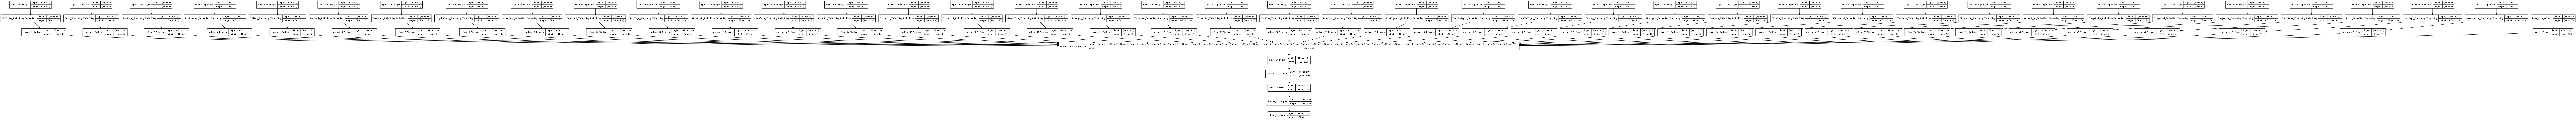

In [26]:
import keras
import pydotplus
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(NN_Create(), to_file='model.png',show_shapes = True, show_layer_names=True)

from IPython.display import Image
Image(retina=True, filename='model.png')